In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

np.random.seed(42)

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler

from preprocessing.getdata import *

In [7]:
df_o = get_csvdata(False, False)
df_a = get_csvdata_ADNI(False)

In [8]:
data_a = get_slices_ADNI_new(df_a['ID'], dim=2, m=90)
data_o = get_slices(df_o['ID'], dim=2, m=90)

In [9]:
data = np.concatenate([data_a, data_o], axis=0)

labels = np.concatenate([df_a['label'], df_o['label']])

dataset = np.concatenate([np.zeros(len(df_a)), np.ones(len(df_o))])

data = data.reshape((len(data), -1))

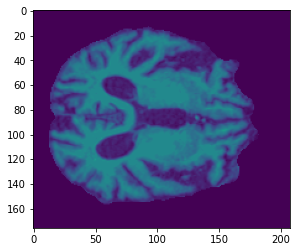

In [10]:
plt.imshow(data_a[3], vmin=0, vmax=1)

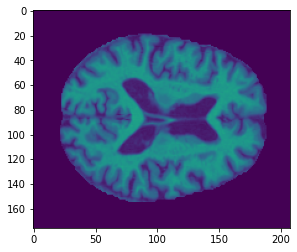

In [11]:
plt.imshow(data_o[2], vmin=0, vmax=1)

In [12]:
pca = PCA(n_components=2)
data_trans = pca.fit_transform(data.reshape((len(data), -1)))

<AxesSubplot:>

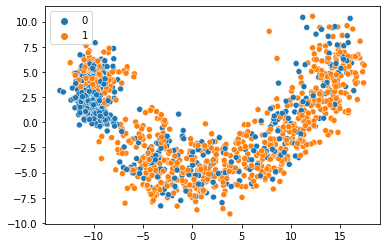

In [13]:
sns.scatterplot(x = data_trans[:,0], y = data_trans[:,1], hue=labels)

<AxesSubplot:>

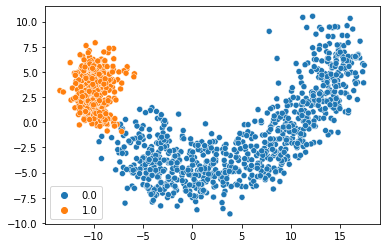

In [14]:
sns.scatterplot(x = data_trans[:,0], y = data_trans[:,1], hue=dataset)

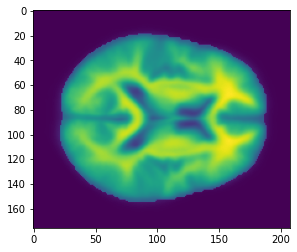

In [52]:
im = pca.inverse_transform([-10,0])
plt.imshow(im.reshape(data_a.shape[1], -1))

In [16]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data_trans, dataset)

In [18]:
log.fit(X_train, y_train)

LogisticRegression()

In [19]:
pred = log.predict(X_test)

In [20]:
confusion_matrix(pred, y_test)

array([[200,   0],
       [  0, 117]], dtype=int64)

In [21]:
accuracy_score(pred, y_test)

1.0

In [22]:
X_train, X_test, y_train, y_test = get_kaggle()

In [23]:
X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test])

In [39]:
pcak = PCA(n_components=2)
X_trans = pcak.fit_transform(X.reshape((len(X), -1)))

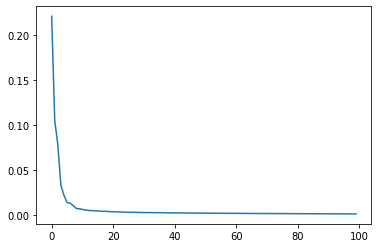

In [25]:
plt.plot(pcak.explained_variance_ratio_)

In [40]:
a_trans = pcak.transform(data.reshape((len(data), -1)))

<AxesSubplot:>

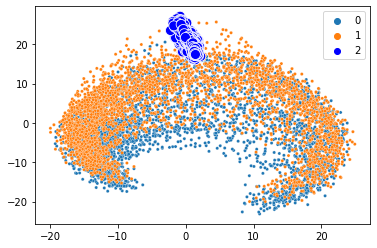

In [41]:
i=0
j=1

color_dict = dict({2: 'blue', 3: 'red'})
sns.scatterplot(x = X_trans[:,i], y = X_trans[:,j], hue=y, s = 10)
sns.scatterplot(x = a_trans[:,i], y = a_trans[:,j], s = 100, hue=2, palette=color_dict)
#sns.scatterplot(x = o_trans[:,i], y = o_trans[:,j], s = 100, hue=3, palette=color_dict)

In [ ]:
a_trans = pcak.transform(data_a.reshape((len(data_a),-1)))
o_trans = pcak.transform(data_o.reshape((len(data_o),-1)))

In [ ]:
data_a.reshape((831,-1))

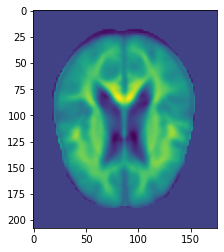

In [51]:
im = pcak.inverse_transform([20,20])
plt.imshow(im.reshape(X.shape[1], -1))

In [27]:
df_o = get_csvdata()
df_a = get_csvdata_ADNI()

for ID in ['013_S_1275', '099_S_0533', '123_S_0050', '131_S_0457', '137_S_0796']:
    df_a = df_a[df_a['ID']!=ID]

df_a['CDR'] = df_a['label'].astype(int)



In [ ]:
data_a = get_3D_data_ADNI2(df_a['ID'])
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(data_a, df_a['CDR'], stratify = df_a['CDR'], random_state=42)
del data_a

data_o = get_3D_data(df_o['ID'])
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(data_o, df_o['CDR'], stratify = df_o['CDR'], random_state=42)
del data_o

X_train_o = X_train_o.astype(np.float16)/X_train_o.max()
X_train_o = (X_train_o*255).astype(np.uint8)

X_train = np.concatenate((X_train_o, X_train_a), axis=0)
X_test = np.concatenate((X_test_o, X_test_a), axis=0)

y_train = np.concatenate((y_train_o, y_train_a))
y_test = np.concatenate((y_test_o, y_test_a))

X_train = X_train.reshape((len(X_train),-1))
X_test = X_test.reshape((len(X_test),-1))

del X_train_a
del X_test_a
del X_train_o
del X_test_o

In [ ]:
data_o = get_3D_data(df_o['ID'])
X_train, X_test, y_train, y_test = train_test_split(data_o, df_o['CDR'], stratify = df_o['CDR'], random_state=42)
del data_o

X_train = X_train.astype(np.float16)/X_train.max()

X_train = X_train.reshape((len(X_train),-1))
X_test = X_test.reshape((len(X_test),-1))

In [ ]:
#X_train = X_train.astype(np.float16)/X_train.max()
#X_test = X_test.astype(np.float16)/X_train.max()

In [ ]:
model = SVC()#C=10, gamma=10, kernel='rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
accuracy_score(y_train, model.predict(X_train))

0.5


0.75

In [ ]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [ ]:
#X_train = X_train.astype(np.float32)
#X_test = X_test.astype(np.float32)

In [ ]:
X_train.dtype

dtype('float32')

In [ ]:
#pca = IncrementalPCA(batch_size=10)
pca = PCA(n_components=1000)#, svd_solver='randomized')
pca.fit(X_train)

ValueError: n_components=1000 must be between 0 and min(n_samples, n_features)=136 with svd_solver='full'

In [ ]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

MemoryError: Unable to allocate 21.7 GiB for an array with shape (453, 6443008) and data type float64

In [ ]:
X_train.shape

(453, 6443008)

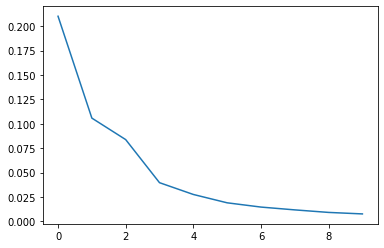

In [ ]:
plt.plot(pca.explained_variance_ratio_)

In [ ]:
model = SVC()#C=10, gamma=10, kernel='rbf')
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print(acc)
accuracy_score(y_train, model.predict(X_train_pca))

0.5434782608695652


1.0

In [ ]:
print(X_train.shape)
print(X_train_pca.shape)

(136, 6443008)
(136, 136)


In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']}

gs = GridSearchCV(SVC(), param_grid=param_grid, n_jobs=-1, verbose=3, scoring='accuracy')

gs.fit(X_train_pca, y_train)
gs.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}

In [ ]:
model = gs.best_estimator_

In [ ]:
y_pred = model.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print(acc)
accuracy_score(y_train, model.predict(X_train_pca))

0.6086956521739131


0.4852941176470588

accuracy:  0.61
recall:  0.74
precision:  0.59


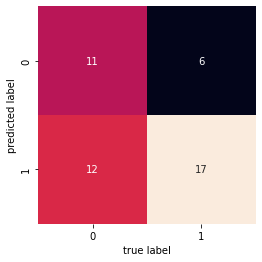

In [ ]:
# Plotting the confusing matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print('accuracy: ' , accuracy_score(y_test, y_pred).round(2))
print('recall: ' , recall_score(y_test, y_pred).round(2))
print('precision: ' , precision_score(y_test, y_pred).round(2))

In [ ]:
df = pd.read_csv('../data/oasis_cross-sectional.csv')
df['CDR'].fillna(0, inplace=True)
df= df[df["Delay"].isna() == True]
df.drop(labels=['Delay', 'Hand'], axis=1, inplace=True)
df['label']=(df['CDR']>0).astype(int)
df = df.join(pd.get_dummies(df["CDR"].replace({0.0:"CN", 0.5:"MCI", 1.0:"AD", 2.0:"AD"})))
def label(row):
    if row.CN == 1:
        return "CN"
    if row.MCI == 1:
        return "MCI"
    if row.AD == 1:
        return "AD"
df["label"] = df.apply(lambda row: label(row), axis=1)
df["dataset"] = "OASIS"

In [ ]:
df

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,label,AD,CN,MCI,dataset
0,OAS1_0001_MR1,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,CN,0,1,0,OASIS
1,OAS1_0002_MR1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,CN,0,1,0,OASIS
2,OAS1_0003_MR1,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,MCI,0,0,1,OASIS
3,OAS1_0004_MR1,M,28,NaN,NaN,NaN,0.0,1588,0.803,1.105,CN,0,1,0,OASIS
4,OAS1_0005_MR1,M,18,NaN,NaN,NaN,0.0,1737,0.848,1.010,CN,0,1,0,OASIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,OAS1_0453_MR1,F,70,1.0,4.0,29.0,0.5,1295,0.748,1.355,MCI,0,0,1,OASIS
412,OAS1_0454_MR1,F,73,3.0,2.0,23.0,0.5,1536,0.730,1.142,MCI,0,0,1,OASIS
413,OAS1_0455_MR1,F,61,2.0,4.0,28.0,0.0,1354,0.825,1.297,CN,0,1,0,OASIS
414,OAS1_0456_MR1,M,61,5.0,2.0,30.0,0.0,1637,0.780,1.072,CN,0,1,0,OASIS
